# Crystal Dataset

In [1]:
import pymatgen
# import pymatgen.core.structure
import numpy as np
import os
from pymatgen.core.structure import Structure
import json
import csv 
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import gaussian_kde
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import tensorflow as tf
from tensorflow import keras

2023-06-05 16:52:17.248629: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 16:52:18.071583: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/chris/.mujoco/mujoco210/bin:/usr/lib/nvidia
2023-06-05 16:52:18.071637: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/chris/.mujoco/mujoco210/bin:/usr/lib/nvidia
2023-06-05 16:52:18.071642: 

Prepare some test data.

### 0. Crystal dataset

Data is organized like:

 ```bash
 ├── data_directory
    ├── file_directory
    │   ├── *.cif
    │   ├── *.cif
    │   └── ...
    ├── file_name.csv
    └── file_name.pymatgen.json
 ```

In [2]:
from kgcnn.data.crystal import CrystalDataset

In [3]:
dataset = CrystalDataset(
    data_directory="ExampleCrystal/", 
    dataset_name="ExampleCrystal", 
    file_name="data.csv", 
    file_directory="CifFiles"
)

In [3]:
double_perovskite = CrystalDataset(
    data_directory="perovskites/double_perovskites", 
    dataset_name="perovskites/double_perovskites", 
    file_name="targets_745.csv", 
    file_directory="bvm"
)

# /home/chris/Desktop/gnn_model/gcnn_keras/notebooks/perovskites/double_perovskites

In [16]:
double_perovskite_hse06 = CrystalDataset(
    data_directory="perovskites/double_perovskites", 
    dataset_name="perovskites/double_perovskites", 
    file_name="targets_hse06.csv", 
    file_directory="1143_dft_cifs"
)

In [4]:
double_perovskite_test = CrystalDataset(
    data_directory="perovskites/double_perovskites/", 
    dataset_name="perovskites/double_perovskites/", 
    file_name="targets_test.csv", 
    file_directory="all_other_bvm_cifs"
)

In [5]:
single_perovskite = CrystalDataset(
    data_directory="perovskites/single_perovskites/", 
    dataset_name="perovskites/single_perovskites/", 
    file_name="targets_shuffle.csv", 
    file_directory="bvm"
)

In [7]:
nominal_dataset = CrystalDataset(
    data_directory="data_zunger_group/", 
    dataset_name="data_zunger_group/", 
    file_name="targets_nominal.csv", 
    file_directory="nominal_cifs"
)

In [3]:
dp_bvm_cubic_cif = CrystalDataset(
    data_directory="perovskites/double_perovskites/", 
    dataset_name="perovskites/double_perovskites/", 
    file_name="targets_bvm_cubic.csv", 
    file_directory="bvm_cubic_cifs"
)

### 1. Generate a json-serialized list of structures via `prepare_data`

In [4]:
# double_perovskite.prepare_data(file_column_name="file_name", overwrite=True)
# double_perovskite_hse06.prepare_data(file_column_name="file_name", overwrite=True)
# double_perovskite_test.prepare_data(file_column_name="file_name", overwrite=True)
# single_perovskite.prepare_data(file_column_name="file_name", overwrite=True)
dp_bvm_cubic_cif.prepare_data(file_column_name="file_name", overwrite=True)

# nominal_dataset.prepare_data(file_column_name="file_name", overwrite=True)

INFO:kgcnn.data.perovskites/double_perovskites/:Searching for structure files in 'perovskites/double_perovskites/bvm_cubic_cifs'
INFO:kgcnn.data.perovskites/double_perovskites/:Read 144167 single files.
INFO:kgcnn.data.perovskites/double_perovskites/:... Read .cif file 0 from 144167


--------------------------------------------------------------


INFO:kgcnn.data.perovskites/double_perovskites/:... Read .cif file 5000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/:... Read .cif file 10000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/:... Read .cif file 15000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/:... Read .cif file 20000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/:... Read .cif file 25000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/:... Read .cif file 30000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/:... Read .cif file 35000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/:... Read .cif file 40000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/:... Read .cif file 45000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/:... Read .cif file 50000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/:... Read .cif file 55000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/:... Read .cif file

<CrystalDataset []>

In [17]:
double_perovskite_hse06.prepare_data(file_column_name="file_name", overwrite=True)


INFO:kgcnn.data.perovskites/double_perovskites:Searching for structure files in 'perovskites/double_perovskites/1143_dft_cifs'
INFO:kgcnn.data.perovskites/double_perovskites:Read 430 single files.
INFO:kgcnn.data.perovskites/double_perovskites:... Read .cif file 0 from 430


--------------------------------------------------------------


INFO:kgcnn.data.perovskites/double_perovskites:Exporting as dict for pymatgen ...
INFO:kgcnn.data.perovskites/double_perovskites:Saving structures as .json ...


<CrystalDataset []>

### 2. Read in memory with `read_in_memory`.

In [5]:
# double_perovskite.read_in_memory(label_column_name="label")
# double_perovskite_hse06.read_in_memory(label_column_name="label")
# double_perovskite_test.read_in_memory(label_column_name="label")
# single_perovskite.read_in_memory(label_column_name="label")

dp_bvm_cubic_cif.read_in_memory(label_column_name="label")

# nominal_dataset.read_in_memory(label_column_name="label")

INFO:kgcnn.data.perovskites/double_perovskites/:Making node features from structure...
INFO:kgcnn.data.perovskites/double_perovskites/:Reading structures from .json ...
INFO:kgcnn.data.perovskites/double_perovskites/: ... read structures 0 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/: ... read structures 5000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/: ... read structures 10000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/: ... read structures 15000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/: ... read structures 20000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/: ... read structures 25000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/: ... read structures 30000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/: ... read structures 35000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/: ... read structures 40000 from 144167
INFO:kgcnn.data.perovskites/double_perovskites/: ... 

<CrystalDataset [{'graph_labels': array(0), 'node_coordinates': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.47008670e-07,  1.37777805e+01,  7.54548994e-07],
       [-4.98005780e-07,  9.18518700e+00,  5.03032662e-07],
       [-2.49002891e-07,  4.59259350e+00,  2.51516331e-07],
       [ 2.16496875e+00,  1.07160515e+01,  7.53011064e-07],
       [-2.16496975e+00,  7.65432250e+00,  2.53054261e-07],
       [ 1.08248425e+00,  7.65432250e+00,  1.87491875e+00],
       [-1.08248525e+00,  1.07160515e+01, -1.87491775e+00],
       [-1.08248525e+00,  1.07160515e+01,  1.87491875e+00],
       [ 1.08248425e+00,  7.65432250e+00, -1.87491775e+00]]), 'node_frac_coordinates': array([[0.  , 0.  , 0.  ],
       [0.75, 0.75, 0.75],
       [0.5 , 0.5 , 0.5 ],
       [0.25, 0.25, 0.25],
       [0.75, 0.75, 0.25],
       [0.25, 0.25, 0.75],
       [0.75, 0.25, 0.25],
       [0.25, 0.75, 0.75],
       [0.75, 0.25, 0.75],
       [0.25, 0.75, 0.25]]), 'graph_lattice': array([[ 2.16496900e

In [18]:
double_perovskite_hse06.read_in_memory(label_column_name="label")


INFO:kgcnn.data.perovskites/double_perovskites:Making node features from structure...
INFO:kgcnn.data.perovskites/double_perovskites:Reading structures from .json ...
INFO:kgcnn.data.perovskites/double_perovskites: ... read structures 0 from 430


<CrystalDataset [{'graph_labels': array(2.5914), 'node_coordinates': array([[-1.33226763e-15,  5.02714176e+00,  4.44089210e-16],
       [ 4.44089210e-16,  1.50814253e+01,  8.88178420e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00542835e+01,  4.44089210e-16],
       [ 2.45156638e+00,  1.17878027e+01,  0.00000000e+00],
       [-2.45156638e+00,  8.32076431e+00, -5.55111512e-16],
       [ 1.22578319e+00,  8.32076431e+00,  2.12311877e+00],
       [-1.22578319e+00,  1.17878027e+01, -2.12311877e+00],
       [-1.22578319e+00,  1.17878027e+01,  2.12311877e+00],
       [ 1.22578319e+00,  8.32076431e+00, -2.12311877e+00]]), 'node_frac_coordinates': array([[0.25      , 0.25      , 0.25      ],
       [0.75      , 0.75      , 0.75      ],
       [0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.5       ],
       [0.75862398, 0.75862398, 0.24137602],
       [0.24137602, 0.24137602, 0.75862398],
       [0.75862398, 0.24137602, 0.

Read pymatgen only via `get_structures_from_json_file`. The structures are not assigned to the dataset but returned by the function.

In [6]:
# double_perovskite.get_structures_from_json_file()
# double_perovskite_hse06.get_structures_from_json_file()
# double_perovskite_test.get_structures_from_json_file()
# single_perovskite.get_structures_from_json_file()

dp_bvm_cubic_cif.get_structures_from_json_file()

# nominal_dataset.get_structures_from_json_file()

INFO:kgcnn.data.perovskites/double_perovskites/:Reading structures from .json ...


[Structure Summary
 Lattice
     abc : 7.49967374 7.4996732385053 7.499673967039922
  angles : 59.99999751942831 59.99999970429874 59.99999568398608
  volume : 298.2717173677085
       A : 2.1649690003856206 6.123458001491957 3.7498370014947326
       B : 2.1649690003856206 6.123458001491957 -3.749835998505267
       C : -4.3299389967828015 6.123458001491957 3.0758600111369105e-09
     pbc : True True True
 PeriodicSite: Rb (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
 PeriodicSite: Be (-0.0000, 13.7778, 0.0000) [0.7500, 0.7500, 0.7500]
 PeriodicSite: Tl (-0.0000, 9.1852, 0.0000) [0.5000, 0.5000, 0.5000]
 PeriodicSite: Sn (-0.0000, 4.5926, 0.0000) [0.2500, 0.2500, 0.2500]
 PeriodicSite: F (2.1650, 10.7161, 0.0000) [0.7500, 0.7500, 0.2500]
 PeriodicSite: F (-2.1650, 7.6543, 0.0000) [0.2500, 0.2500, 0.7500]
 PeriodicSite: F (1.0825, 7.6543, 1.8749) [0.7500, 0.2500, 0.2500]
 PeriodicSite: F (-1.0825, 10.7161, -1.8749) [0.2500, 0.7500, 0.7500]
 PeriodicSite: F (-1.0825, 10.7161, 1.874

In [19]:
double_perovskite_hse06.get_structures_from_json_file()


INFO:kgcnn.data.perovskites/double_perovskites:Reading structures from .json ...


[Structure Summary
 Lattice
     abc : 8.20928812 8.20928812 8.20928812
  angles : 60.00000000000001 60.00000000000001 60.00000000000001
  volume : 391.2023878918096
       A : 2.3698173529685986 6.7028556818305995 4.104644060000001
       B : 2.3698173529685986 6.7028556818305995 -4.104644059999999
       C : -4.739634705937196 6.7028556818305995 -0.0
     pbc : True True True
 PeriodicSite: Cs (-0.0000, 5.0271, 0.0000) [0.2500, 0.2500, 0.2500]
 PeriodicSite: Cs (0.0000, 15.0814, 0.0000) [0.7500, 0.7500, 0.7500]
 PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
 PeriodicSite: Pb (0.0000, 10.0543, 0.0000) [0.5000, 0.5000, 0.5000]
 PeriodicSite: Br (2.4516, 11.7878, 0.0000) [0.7586, 0.7586, 0.2414]
 PeriodicSite: Br (-2.4516, 8.3208, -0.0000) [0.2414, 0.2414, 0.7586]
 PeriodicSite: Br (1.2258, 8.3208, 2.1231) [0.7586, 0.2414, 0.2414]
 PeriodicSite: Br (-1.2258, 11.7878, -2.1231) [0.2414, 0.7586, 0.7586]
 PeriodicSite: Br (-1.2258, 11.7878, 2.1231) [0.7586, 0.2414, 0.75

Or save them directly to json without collecting individual files.

### 3. Generate graph

In [7]:
# double_perovskite.map_list(method="set_range_periodic", max_distance=5.0, max_neighbours=20)
# double_perovskite_hse06.map_list(method="set_range_periodic", max_distance=5.0, max_neighbours=20)
# double_perovskite_test.map_list(method="set_range_periodic", max_distance=5.0, max_neighbours=20)
# single_perovskite.map_list(method="set_range_periodic", max_distance=5.0, max_neighbours=20)
# nominal_dataset.map_list(method="set_range_periodic", max_distance=5.0, max_neighbours=20)

dp_bvm_cubic_cif.map_list(method="set_range_periodic", max_distance=5.0, max_neighbours=20)


<CrystalDataset [{'graph_labels': array(0), 'node_coordinates': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.47008670e-07,  1.37777805e+01,  7.54548994e-07],
       [-4.98005780e-07,  9.18518700e+00,  5.03032662e-07],
       [-2.49002891e-07,  4.59259350e+00,  2.51516331e-07],
       [ 2.16496875e+00,  1.07160515e+01,  7.53011064e-07],
       [-2.16496975e+00,  7.65432250e+00,  2.53054261e-07],
       [ 1.08248425e+00,  7.65432250e+00,  1.87491875e+00],
       [-1.08248525e+00,  1.07160515e+01, -1.87491775e+00],
       [-1.08248525e+00,  1.07160515e+01,  1.87491875e+00],
       [ 1.08248425e+00,  7.65432250e+00, -1.87491775e+00]]), 'node_frac_coordinates': array([[0.  , 0.  , 0.  ],
       [0.75, 0.75, 0.75],
       [0.5 , 0.5 , 0.5 ],
       [0.25, 0.25, 0.25],
       [0.75, 0.75, 0.25],
       [0.25, 0.25, 0.75],
       [0.75, 0.25, 0.25],
       [0.25, 0.75, 0.75],
       [0.75, 0.25, 0.75],
       [0.25, 0.75, 0.25]]), 'graph_lattice': array([[ 2.16496900e

In [20]:
double_perovskite_hse06.map_list(method="set_range_periodic", max_distance=5.0, max_neighbours=20)


<CrystalDataset [{'graph_labels': array(2.5914), 'node_coordinates': array([[-1.33226763e-15,  5.02714176e+00,  4.44089210e-16],
       [ 4.44089210e-16,  1.50814253e+01,  8.88178420e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00542835e+01,  4.44089210e-16],
       [ 2.45156638e+00,  1.17878027e+01,  0.00000000e+00],
       [-2.45156638e+00,  8.32076431e+00, -5.55111512e-16],
       [ 1.22578319e+00,  8.32076431e+00,  2.12311877e+00],
       [-1.22578319e+00,  1.17878027e+01, -2.12311877e+00],
       [-1.22578319e+00,  1.17878027e+01,  2.12311877e+00],
       [ 1.22578319e+00,  8.32076431e+00, -2.12311877e+00]]), 'node_frac_coordinates': array([[0.25      , 0.25      , 0.25      ],
       [0.75      , 0.75      , 0.75      ],
       [0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.5       ],
       [0.75862398, 0.75862398, 0.24137602],
       [0.24137602, 0.24137602, 0.75862398],
       [0.75862398, 0.24137602, 0.

### 4. Model training

In [40]:
from kgcnn.literature.PAiNN import make_crystal_model
from tensorflow.keras.optimizers import Adam

In [9]:
model_config = {
    "name": "Schnet",
    "inputs": [
        {'shape': (None,), 'name': "node_number", 'dtype': 'float32', 'ragged': True},
        {'shape': (None, 3), 'name': "node_coordinates", 'dtype': 'float32', 'ragged': True},
        {'shape': (None, 2), 'name': "range_indices", 'dtype': 'int64', 'ragged': True},
        {'shape': (None, 3), 'name': "range_image", 'dtype': 'int64', 'ragged': True},
        {'shape': (3, 3), 'name': "graph_lattice", 'dtype': 'float32', 'ragged': False}
    ],
    "input_embedding": {
        "node": {"input_dim": 95, "output_dim": 64}
    },
    "interaction_args": {
        "units": 128, "use_bias": True, "activation": "kgcnn>shifted_softplus", "cfconv_pool": "sum"
    },
    "node_pooling_args": {"pooling_method": "mean"},
    "depth": 8,
    "gauss_args": {"bins": 25, "distance": 8, "offset": 0.0, "sigma": 0.4}, "verbose": 10,
    "last_mlp": {"use_bias": [True, True, True], "units": [128, 64, 1],
                 "activation": ['kgcnn>shifted_softplus', 'kgcnn>shifted_softplus', 'linear']},
    "output_embedding": "graph",
    "use_output_mlp": False,
    "output_mlp": None,  # Last MLP sets output dimension if None.
}
model = make_crystal_model(**model_config)

INFO:kgcnn.model.utils:Updated model kwargs:
INFO:kgcnn.model.utils:{'name': 'Schnet', 'inputs': [{'shape': (None,), 'name': 'node_number', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 3), 'name': 'node_coordinates', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 2), 'name': 'range_indices', 'dtype': 'int64', 'ragged': True}, {'shape': (None, 3), 'name': 'range_image', 'dtype': 'int64', 'ragged': True}, {'shape': (3, 3), 'name': 'graph_lattice', 'dtype': 'float32', 'ragged': False}], 'input_embedding': {'node': {'input_dim': 95, 'output_dim': 64}}, 'make_distance': True, 'expand_distance': True, 'interaction_args': {'units': 128, 'use_bias': True, 'activation': 'kgcnn>shifted_softplus', 'cfconv_pool': 'sum'}, 'node_pooling_args': {'pooling_method': 'mean'}, 'depth': 8, 'gauss_args': {'bins': 25, 'distance': 8, 'offset': 0.0, 'sigma': 0.4}, 'verbose': 10, 'last_mlp': {'use_bias': [True, True, True], 'units': [128, 64, 1], 'activation': ['kgcnn>shifted_softplus', 'kgcnn>s

In [41]:
model_config = {
    "name": "PAiNN",
    "inputs": [
        {"shape": (None,),   "name": "node_number", "dtype": "float32", "ragged": True},
        {"shape": (None, 3), "name": "node_coordinates", "dtype": "float32", "ragged": True},
        {"shape": (None, 2), "name": "range_indices", "dtype": "int64", "ragged": True},
        {'shape': (None, 3), 'name': "range_image", 'dtype': 'int64', 'ragged': True},
        {'shape': (3, 3), 'name': "graph_lattice", 'dtype': 'float32', 'ragged': False}
    ],
    "input_embedding": {"node": {"input_dim": 95, "output_dim": 128}},
    "equiv_initialize_kwargs": {"dim": 3, "method": "ones"},
    "bessel_basis": {"num_radial": 20, "cutoff": 3, "envelope_exponent": 5},
    "pooling_args": {"pooling_method": "sum"},
    "conv_args": {"units": 128, "cutoff": None, "conv_pool": "sum"},
    "update_args": {"units": 128},
    "equiv_normalization": False, "node_normalization": False,
    "depth": 2,
    "verbose": 10,
    "output_embedding": "graph", "output_to_tensor": True,
    "output_mlp": {"use_bias": [True, True], "units": [128, 1], "activation": ["swish", "linear"]}
}
model = make_crystal_model(**model_config)

INFO:kgcnn.model.utils:Updated model kwargs:
INFO:kgcnn.model.utils:{'name': 'PAiNN', 'inputs': [{'shape': (None,), 'name': 'node_number', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 3), 'name': 'node_coordinates', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 2), 'name': 'range_indices', 'dtype': 'int64', 'ragged': True}, {'shape': (None, 3), 'name': 'range_image', 'dtype': 'int64', 'ragged': True}, {'shape': (3, 3), 'name': 'graph_lattice', 'dtype': 'float32', 'ragged': False}], 'input_embedding': {'node': {'input_dim': 95, 'output_dim': 128}}, 'equiv_initialize_kwargs': {'dim': 3, 'method': 'ones'}, 'bessel_basis': {'num_radial': 20, 'cutoff': 3, 'envelope_exponent': 5}, 'pooling_args': {'pooling_method': 'sum'}, 'conv_args': {'units': 128, 'cutoff': None, 'conv_pool': 'sum'}, 'update_args': {'units': 128}, 'equiv_normalization': False, 'node_normalization': False, 'depth': 2, 'verbose': 10, 'output_embedding': 'graph', 'output_to_tensor': True, 'output_mlp': {'use

In [13]:
y_test = np.expand_dims(double_perovskite_test.get("graph_labels"), axis=-1)  # Change units by 1000
x_test = double_perovskite_test.tensor(model_config["inputs"])

In [42]:
y_test_bvm_cubic = np.expand_dims(dp_bvm_cubic_cif.get("graph_labels"), axis=-1)  # Change units by 1000
x_test_bvm_cubic = dp_bvm_cubic_cif.tensor(model_config["inputs"])

In [40]:
y_real_noda = []
y_predict_noda = []
y_real_da  = []
y_predict_da  = []

In [45]:
print(y_real_da)
print(y_predict_da)

[]
[]


In [22]:
!pip install wandb -qqq
import wandb
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

········


wandb: Appending key for api.wandb.ai to your netrc file: /home/chris/.netrc


True

In [26]:
# import wandb
from wandb.keras import WandbCallback

In [17]:
037e4c28b966796049bee3c96baff983bd93edeb


SyntaxError: invalid syntax (2214811894.py, line 1)

In [23]:
wandb.init(project="domain-adaptation",
           config={
               "batch_size": 50,
               "learning_rate": 0.0005,
               "epochs":250
           })

wandb: Currently logged in as: dipannoydip. Use `wandb login --relogin` to force relogin


In [10]:
def train_model(repeat, data_input, data_label, left_x, left_y, path):
    train_loss = []
    val_loss = []
    test_loss= []
    test_loss_left = []
    for i in range(0,repeat):
        train_index, test_val_index = train_test_split(np.arange(len(data_input)), test_size=0.1, random_state=np.random.randint(i*11+31))
        x_train, y_train = data_input[train_index].tensor(model_config["inputs"]), data_label[train_index]
        x_test_val, y_test_val = data_input[test_val_index], data_label[test_val_index]
        test_index, val_index = train_test_split(np.arange(len(x_test_val)), test_size=0.5, random_state=np.random.randint(i*7+43))
        x_test, y_test = x_test_val[test_index].tensor(model_config["inputs"]), y_test_val[test_index]
        x_val, y_val = x_test_val[val_index].tensor(model_config["inputs"]), y_test_val[val_index]
        # x_train = data_input
        # y_train = data_label
        x_test_left = left_x
        y_test_left = left_y
        model = make_crystal_model(**model_config)
        checkpoint_filepath = 'halide_source_model_weights/schnet/checkpoint_schnet_double_perovskite_bvm_bg' + str(i)
#         wandb.log(model, log='all')
        model.compile(
            loss="mean_absolute_error",
            optimizer=Adam(learning_rate=0.0005),
            metrics=["mean_absolute_error"],
        )
        model.load_weights(checkpoint_filepath)
        history = model.fit(
        x_train, y_train,
        shuffle=True,
        batch_size=50,
        epochs=5,
        verbose=0,
        validation_data = (x_val, y_val),
#         callbacks=[WandbCallback(verbose=0,log_weights=(True), log_gradients=(True), training_data=x_train)]
        
#         callbacks=[model_checkpoint_callback],
        )
        
#         plt.plot(history.history['loss'])
#         plt.plot(history.history['val_loss'])
#         plt.title('model loss')
#         plt.ylabel('loss')
#         plt.xlabel('epoch')
#         plt.legend(['train', 'validation'], loc='upper left')
#         plt.ylim(ymax=1)
#         plt.show()
        train_score=model.evaluate(x_train, y_train)
        val_score = model.evaluate(x_val, y_val)
        test_score = model.evaluate(x_test, y_test)
        
#         x_tensor = tf.convert_to_tensor(x_train, dtype=tf.float32)
# =========================================Gradient==================================================
#         with tf.GradientTape() as t:
#             t.watch(x_train)
#             output = model(x_train)

#         result = output
#         gradients = t.gradient(output, x_train)
#         print(gradients)
# =========================================Gradient==================================================
     
#         y_train_pred = model.predict(x_train)
#         y_test_pred = model.predict(x_test)
#         scatter_comp(y_train,y_train_pred , y_test,y_test_pred , 'Ground Truth', 'Prediction', 'demo.pdf')
#         print(train_score)
#         print(val_score)
#         print(test_score)
        train_loss.append(train_score[0])
        val_loss.append(val_score[0])
        test_loss.append(test_score[0])
        print(train_loss)
        print(np.mean(train_loss))
        print(np.std(train_loss))
        print(val_loss)
        print(np.mean(val_loss))
        print(np.std(val_loss))
        print(test_loss)   
        print(np.mean(test_loss))        
        print(np.std(test_loss))
        
#         model_name =  './models_da/schnet/model_da_dp_schnet_dblbvm_hse06'+str(np.round(test_loss,3))
#         model.save(model_name)
        # test_error = mae(y_predict, y_test)
        # test_loss.append(test_error)
        
#         print(mae(y_predict, y_test))
#         print('-----------------------------------------------Unseen--------------------------------------------------')
#         y_predict_left = model.predict(x_test_left)
#         test_error_left = mae(y_predict_left, y_test_left)
#         test_loss_left.append(test_error_left)
# #         y_real_noda = copy.deepcopy(y_test_left)
# #         y_predict_noda = copy.deepcopy(y_predict_left)
# #         scatter_comp(y_train,y_train_pred , y_test,y_test_pred , 'Ground Truth', 'Prediction', 'demo.pdf')
#         print(test_loss_left)
#         print(np.mean(test_loss_left))
#         print(np.std(test_loss_left))        
#         df_rel = pd.read_csv('./perovskites/double_perovskites/targets_test_200.csv')
#         tr_list = []
#         details = ['id','target','prediction']
#         index = 0
#         for j in df_rel.index:
#             temp_key = []
#             temp_key.append(df_rel['file_name'][j].split('.')[0])
#             # temp_key.append(df_rel['correct_formula'][i])
#             temp_key.append(df_rel['label'][j])
#             temp_key.append(y_predict_left[index])
#             index = index+1
#             tr_list.append(temp_key)
#         file_name = './all_predictions/schnet/prediction_da_sp760_schnet_dblbvm_943_hfopt' +str(np.round(test_error_left,3)) + '.csv'
#         model_name =  './models_da/schnet/prediction_da_sp760_schnet_dblbvm_943_hfopt'+str(np.round(test_error_left,3))
#         model.save(model_name)

#         with open(file_name, 'w') as f: 
#             write = csv.writer(f) 
#             write.writerow(details) 
#             write.writerows(tr_list) 
#             f.close()
#         print('=================================================================')

In [26]:
def train_model_2(repeat, data_input, data_label):
    train_loss = []
    val_loss = []
    test_loss= []
    test_loss_left = []
    for i in range(0,repeat):
        train_index, test_val_index = train_test_split(np.arange(len(data_input)), test_size=0.1, random_state=np.random.randint(i*11+31))
        x_train, y_train = data_input[train_index].tensor(model_config["inputs"]), data_label[train_index]
        x_test_val, y_test_val = data_input[test_val_index], data_label[test_val_index]
        test_index, val_index = train_test_split(np.arange(len(x_test_val)), test_size=0.5, random_state=np.random.randint(i*7+43))
        x_test, y_test = x_test_val[test_index].tensor(model_config["inputs"]), y_test_val[test_index]
        x_val, y_val = x_test_val[val_index].tensor(model_config["inputs"]), y_test_val[val_index]
        # x_train = data_input
        # y_train = data_label
#         x_test_left = left_x
#         y_test_left = left_y
        model = make_crystal_model(**model_config)
        checkpoint_filepath = 'halide_source_model_weights/schnet/checkpoint_schnet_double_perovskite_bvm_bg' + str(i)
        model.compile(
            loss="mean_absolute_error",
            optimizer=Adam(learning_rate=0.0005),
            metrics=["mean_absolute_error"],
        )
        model.load_weights(checkpoint_filepath)
        hist = model.fit(
        x_train, y_train,
        shuffle=True,
        batch_size=50,
        epochs=250,
        verbose=0,
        validation_data = (x_val, y_val),
#         callbacks=[model_checkpoint_callback],
        )
#         plt.plot(hist.history['loss'])
#         plt.plot(hist.history['val_loss'])
#         plt.title('model loss')
#         plt.ylabel('loss')
#         plt.xlabel('epoch')
#         plt.legend(['train', 'validation'], loc='upper left')
#         plt.show()
        train_score=model.evaluate(x_train, y_train)
        val_score = model.evaluate(x_val, y_val)
        test_score = model.evaluate(x_test, y_test)
#         y_train_pred = model.predict(x_train)
#         y_test_pred = model.predict(x_test)
#         scatter_comp(y_train,y_train_pred , y_test,y_test_pred , 'Ground Truth', 'Prediction', 'demo.pdf')
#         print(train_score)
#         print(val_score)
#         print(test_score)
        train_loss.append(train_score[0])
        val_loss.append(val_score[0])
        test_loss.append(test_score[0])
        print(train_loss)
        print(np.mean(train_loss))
        print(np.std(train_loss))
        print(val_loss)
        print(np.mean(val_loss))
        print(np.std(val_loss))
        print(test_loss)   
        print(np.mean(test_loss))        
        print(np.std(test_loss))
        model_name =  './models_da/schnet/model_da_dp_schnet_dblbvm_hse06'+str(np.round(test_score[0],3))
        model.save(model_name)
        # test_error = mae(y_predict, y_test)
        # test_loss.append(test_error)
        
#         print(mae(y_predict, y_test))
#         print('-----------------------------------------------Unseen--------------------------------------------------')
#         y_predict_left = model.predict(x_test_left)
#         test_error_left = mae(y_predict_left, y_test_left)
#         test_loss_left.append(test_error_left)
#         print(test_loss_left)
#         print(np.mean(test_loss_left))
#         print(np.std(test_loss_left))        
#         df_rel = pd.read_csv('./perovskites/double_perovskites/targets_bg_test.csv')
#         tr_list = []
#         details = ['id','target','prediction']
#         index = 0
#         for j in df_rel.index:
#             temp_key = []
#             temp_key.append(df_rel['file_name'][j].split('.')[0])
#             # temp_key.append(df_rel['correct_formula'][i])
#             temp_key.append(df_rel['label'][j])
#             temp_key.append(y_predict_left[index])
#             index = index+1
#             tr_list.append(temp_key)
#         file_name = './all_predictions/painn/prediction_da_painn_dblbvm_745_bg' +str(np.round(test_error_left,3)) + '.csv'
#         model_name =  './models_da/painn/model_da_painn_dblbvm_745_bg'+str(np.round(test_error_left,3))
#         model.save(model_name)

#         with open(file_name, 'w') as f: 
#             write = csv.writer(f) 
#             write.writerow(details) 
#             write.writerows(tr_list) 
#             f.close()
#         print('=================================================================')

In [15]:
def train_source_model(repeat, source_input, source_label):
    train_loss = []
    val_loss = []
    test_loss= []
    test_loss_left = []
    for i in range(0,repeat):
        train_index, test_val_index = train_test_split(np.arange(len(source_input)), test_size=0.1, random_state=np.random.randint(i*11+31))
        x_train, y_train = source_input[train_index].tensor(model_config["inputs"]), source_label[train_index]
        x_test_val, y_test_val = source_input[test_val_index], source_label[test_val_index]
        test_index, val_index = train_test_split(np.arange(len(x_test_val)), test_size=0.5, random_state=np.random.randint(i*7+43))
        x_test, y_test = x_test_val[test_index].tensor(model_config["inputs"]), y_test_val[test_index]
        x_val, y_val = x_test_val[val_index].tensor(model_config["inputs"]), y_test_val[val_index]
#         //==================================================================================
#         train_index, test_val_index = train_test_split(np.arange(len(data_input)), test_size=0.1, random_state=np.random.randint(i*11+31))
#         x_train, y_train = data_input[train_index].tensor(model_config["inputs"]), data_label[train_index]
#         x_test_val, y_test_val = data_input[test_val_index], data_label[test_val_index]
#         test_index, val_index = train_test_split(np.arange(len(x_test_val)), test_size=0.5, random_state=np.random.randint(i*7+43))
#         x_test, y_test = x_test_val[test_index].tensor(model_config["inputs"]), y_test_val[test_index]
#         x_val, y_val = x_test_val[val_index].tensor(model_config["inputs"]), y_test_val[val_index]
        # x_train = data_input
        # y_train = data_label
#         x_test_left = left_x
#         y_test_left = left_y
        model = make_crystal_model(**model_config)
#         checkpoint_filepath = 'halide_source_model_weights/painn/checkpoint_painn_single_perovskite_600_bvm_hfopt' + str(i)
        model.compile(
            loss="mean_absolute_error",
            optimizer=Adam(learning_rate=0.0005),
            metrics=["mean_absolute_error"],
        )
        model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_filepath,
            save_weights_only=True,
            monitor='loss',
            mode='min',
            save_best_only=True
        )
#         model.load_weights(checkpoint_filepath)
        hist = model.fit(
        x_train, y_train,
        shuffle=True,
        batch_size=50,
        epochs=250,
        verbose=0,
        validation_data = (x_val, y_val),
        callbacks=[model_checkpoint_callback],
        )
        train_score=model.evaluate(x_train, y_train)
        val_score = model.evaluate(x_val, y_val)
        test_score = model.evaluate(x_test, y_test)
#         print(train_score)
#         print(val_score)
#         print(test_score)
        train_loss.append(train_score[0])
        val_loss.append(val_score[0])
        test_loss.append(test_score[0])
        print(train_loss)
        print(np.mean(train_loss))
        print(np.std(train_loss))
        print(val_loss)
        print(np.mean(val_loss))
        print(np.std(val_loss))
        print(test_loss)   
        print(np.mean(test_loss))        
        print(np.std(test_loss))
        
        model_name =  './halide_source_model/painn/checkpoint_painn_single_perovskite_600_bvm_hfopt'+str(np.round(test_score[0],3))
        model.save(model_name)
        # test_error = mae(y_predict, y_test)
        # test_loss.append(test_error)
        
#         print(mae(y_predict, y_test))
        print('-------------------------------------------------------------------------------------------------')
#         y_predict_left = model.predict(x_test_left)
#         test_error_left = mae(y_predict_left, y_test_left)
#         test_loss_left.append(test_error_left)
#         print(test_loss_left)
#         print(np.mean(test_loss_left))
#         print(np.std(test_loss_left))        
#         df_rel = pd.read_csv('./perovskites/double/targets_test_pred.csv')
#         tr_list = []
#         details = ['id','target','prediction']
#         index = 0
#         for j in df_rel.index:
#             temp_key = []
#             temp_key.append(df_rel['file_name'][j].split('.')[0])
#             # temp_key.append(df_rel['correct_formula'][i])
#             temp_key.append(df_rel['label'][j])
#             temp_key.append(y_predict_left[index])
#             index = index+1
#             tr_list.append(temp_key)
#         file_name = './all_predictions/prediction_nda_' +str(np.round(test_error_left,3)) + '.csv'
#         model_name =  './models_da/model_nda_'+str(np.round(test_error_left,3))
#         model.save(model_name)

#         with open(file_name, 'w') as f: 
#             write = csv.writer(f) 
#             write.writerow(details) 
#             write.writerows(tr_list) 
#             f.close()
#         print('=================================================================')

In [27]:
import copy
train_dataset = copy.deepcopy(double_perovskite_hse06)
labels=np.expand_dims(train_dataset.get("graph_labels"), axis=-1)
# train_model(3, train_dataset, labels, x_test, y_test,'/tmp/checkpoint_single_perovskite')
train_model_2(3, train_dataset, labels)

INFO:kgcnn.model.utils:Updated model kwargs:
INFO:kgcnn.model.utils:{'name': 'Schnet', 'inputs': [{'shape': (None,), 'name': 'node_number', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 3), 'name': 'node_coordinates', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 2), 'name': 'range_indices', 'dtype': 'int64', 'ragged': True}, {'shape': (None, 3), 'name': 'range_image', 'dtype': 'int64', 'ragged': True}, {'shape': (3, 3), 'name': 'graph_lattice', 'dtype': 'float32', 'ragged': False}], 'input_embedding': {'node': {'input_dim': 95, 'output_dim': 64}}, 'make_distance': True, 'expand_distance': True, 'interaction_args': {'units': 128, 'use_bias': True, 'activation': 'kgcnn>shifted_softplus', 'cfconv_pool': 'sum'}, 'node_pooling_args': {'pooling_method': 'mean'}, 'depth': 8, 'gauss_args': {'bins': 25, 'distance': 8, 'offset': 0.0, 'sigma': 0.4}, 'verbose': 10, 'last_mlp': {'use_bias': [True, True, True], 'units': [128, 64, 1], 'activation': ['kgcnn>shifted_softplus', 'kgcnn>s

1/1 [==============================] - 0s 21ms/step - loss: 0.3806 - mean_absolute_error: 0.3806
[0.10991264879703522]
0.10991264879703522
0.0
[0.208146333694458]
0.208146333694458
0.0
[0.38063231110572815]
0.38063231110572815
0.0


INFO:tensorflow:Assets written to: ./models_da/schnet/model_da_dp_schnet_dblbvm_hse060.381/assets


INFO:tensorflow:Assets written to: ./models_da/schnet/model_da_dp_schnet_dblbvm_hse060.381/assets
INFO:kgcnn.model.utils:Updated model kwargs:
INFO:kgcnn.model.utils:{'name': 'Schnet', 'inputs': [{'shape': (None,), 'name': 'node_number', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 3), 'name': 'node_coordinates', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 2), 'name': 'range_indices', 'dtype': 'int64', 'ragged': True}, {'shape': (None, 3), 'name': 'range_image', 'dtype': 'int64', 'ragged': True}, {'shape': (3, 3), 'name': 'graph_lattice', 'dtype': 'float32', 'ragged': False}], 'input_embedding': {'node': {'input_dim': 95, 'output_dim': 64}}, 'make_distance': True, 'expand_distance': True, 'interaction_args': {'units': 128, 'use_bias': True, 'activation': 'kgcnn>shifted_softplus', 'cfconv_pool': 'sum'}, 'node_pooling_args': {'pooling_method': 'mean'}, 'depth': 8, 'gauss_args': {'bins': 25, 'distance': 8, 'offset': 0.0, 'sigma': 0.4}, 'verbose': 10, 'last_mlp': {'use_b

1/1 [==============================] - 0s 17ms/step - loss: 0.1768 - mean_absolute_error: 0.1768
[0.10991264879703522, 0.11980527639389038]
0.1148589625954628
0.004946313798427582
[0.208146333694458, 0.1341470628976822]
0.1711466982960701
0.03699963539838791
[0.38063231110572815, 0.17684012651443481]
0.2787362188100815
0.10189609229564667


INFO:tensorflow:Assets written to: ./models_da/schnet/model_da_dp_schnet_dblbvm_hse060.177/assets


INFO:tensorflow:Assets written to: ./models_da/schnet/model_da_dp_schnet_dblbvm_hse060.177/assets
INFO:kgcnn.model.utils:Updated model kwargs:
INFO:kgcnn.model.utils:{'name': 'Schnet', 'inputs': [{'shape': (None,), 'name': 'node_number', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 3), 'name': 'node_coordinates', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 2), 'name': 'range_indices', 'dtype': 'int64', 'ragged': True}, {'shape': (None, 3), 'name': 'range_image', 'dtype': 'int64', 'ragged': True}, {'shape': (3, 3), 'name': 'graph_lattice', 'dtype': 'float32', 'ragged': False}], 'input_embedding': {'node': {'input_dim': 95, 'output_dim': 64}}, 'make_distance': True, 'expand_distance': True, 'interaction_args': {'units': 128, 'use_bias': True, 'activation': 'kgcnn>shifted_softplus', 'cfconv_pool': 'sum'}, 'node_pooling_args': {'pooling_method': 'mean'}, 'depth': 8, 'gauss_args': {'bins': 25, 'distance': 8, 'offset': 0.0, 'sigma': 0.4}, 'verbose': 10, 'last_mlp': {'use_b

1/1 [==============================] - 0s 19ms/step - loss: 0.1963 - mean_absolute_error: 0.1963
[0.10991264879703522, 0.11980527639389038, 0.10997320711612701]
0.1132303774356842
0.004649221372837127
[0.208146333694458, 0.1341470628976822, 0.11686603724956512]
0.15305314461390176
0.03959042876051534
[0.38063231110572815, 0.17684012651443481, 0.19628402590751648]
0.2512521545092265
0.09182931629424793


INFO:tensorflow:Assets written to: ./models_da/schnet/model_da_dp_schnet_dblbvm_hse060.196/assets


INFO:tensorflow:Assets written to: ./models_da/schnet/model_da_dp_schnet_dblbvm_hse060.196/assets


In [46]:
import copy
train_dataset = copy.deepcopy(double_perovskite_hse06)
labels=np.expand_dims(train_dataset.get("graph_labels"), axis=-1)
train_model(3, train_dataset, labels, x_test, y_test,'/tmp/checkpoint_single_perovskite')

INFO:kgcnn.model.utils:Updated model kwargs:
INFO:kgcnn.model.utils:{'name': 'Schnet', 'inputs': [{'shape': (None,), 'name': 'node_number', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 3), 'name': 'node_coordinates', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 2), 'name': 'range_indices', 'dtype': 'int64', 'ragged': True}, {'shape': (None, 3), 'name': 'range_image', 'dtype': 'int64', 'ragged': True}, {'shape': (3, 3), 'name': 'graph_lattice', 'dtype': 'float32', 'ragged': False}], 'input_embedding': {'node': {'input_dim': 95, 'output_dim': 64}}, 'make_distance': True, 'expand_distance': True, 'interaction_args': {'units': 128, 'use_bias': True, 'activation': 'kgcnn>shifted_softplus', 'cfconv_pool': 'sum'}, 'node_pooling_args': {'pooling_method': 'mean'}, 'depth': 8, 'gauss_args': {'bins': 25, 'distance': 8, 'offset': 0.0, 'sigma': 0.4}, 'verbose': 10, 'last_mlp': {'use_bias': [True, True, True], 'units': [128, 64, 1], 'activation': ['kgcnn>shifted_softplus', 'kgcnn>s

2/2 [==============================] - 0s 9ms/step - loss: 0.1873 - mean_absolute_error: 0.1873


INFO:kgcnn.model.utils:Updated model kwargs:
INFO:kgcnn.model.utils:{'name': 'Schnet', 'inputs': [{'shape': (None,), 'name': 'node_number', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 3), 'name': 'node_coordinates', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 2), 'name': 'range_indices', 'dtype': 'int64', 'ragged': True}, {'shape': (None, 3), 'name': 'range_image', 'dtype': 'int64', 'ragged': True}, {'shape': (3, 3), 'name': 'graph_lattice', 'dtype': 'float32', 'ragged': False}], 'input_embedding': {'node': {'input_dim': 95, 'output_dim': 64}}, 'make_distance': True, 'expand_distance': True, 'interaction_args': {'units': 128, 'use_bias': True, 'activation': 'kgcnn>shifted_softplus', 'cfconv_pool': 'sum'}, 'node_pooling_args': {'pooling_method': 'mean'}, 'depth': 8, 'gauss_args': {'bins': 25, 'distance': 8, 'offset': 0.0, 'sigma': 0.4}, 'verbose': 10, 'last_mlp': {'use_bias': [True, True, True], 'units': [128, 64, 1], 'activation': ['kgcnn>shifted_softplus', 'kgcnn>s

[None, <tf.RaggedTensor [[[-2.910383050010179e-10, 3.813511284533888e-09, -6.984919326963324e-10],
  [1.2514647096395493e-09, -3.3494416129542515e-09,
   2.328306464727953e-10],
  [2.3283064365386963e-10, 5.413312464952469e-09, 2.3283064382734198e-09],
  ...,
  [-0.004033823672216386, 0.005704688359401189, -0.006986785377193883],
  [-0.00403382268268615, 0.005704684313968755, 0.006986782804233371],
  [0.004033822449855506, -0.005704687529942021, -0.006986782920648693]],

 [[5.58793544725919e-09, 1.257285475730896e-08, -3.469446951953614e-18],
  [-8.119968697862384e-09, -7.945345714688301e-09,
   1.1641532182693481e-10],
  [2.619344741973395e-09, -9.124050848186016e-09, 1.3969838684284308e-09],
  ...,
  [0.005924680219322909, -0.008378758262551855, 0.010261858136800583],
  [0.0059246823147987016, -0.008378758990147617, -0.01026185872615315],
  [-0.00592467905516969, 0.00837875812430866, 0.010261855815770105]],

 [[3.2887328411772276e-09, -1.5994373825378716e-08,
   4.656612899098245e-10

INFO:kgcnn.model.utils:Updated model kwargs:
INFO:kgcnn.model.utils:{'name': 'Schnet', 'inputs': [{'shape': (None,), 'name': 'node_number', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 3), 'name': 'node_coordinates', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 2), 'name': 'range_indices', 'dtype': 'int64', 'ragged': True}, {'shape': (None, 3), 'name': 'range_image', 'dtype': 'int64', 'ragged': True}, {'shape': (3, 3), 'name': 'graph_lattice', 'dtype': 'float32', 'ragged': False}], 'input_embedding': {'node': {'input_dim': 95, 'output_dim': 64}}, 'make_distance': True, 'expand_distance': True, 'interaction_args': {'units': 128, 'use_bias': True, 'activation': 'kgcnn>shifted_softplus', 'cfconv_pool': 'sum'}, 'node_pooling_args': {'pooling_method': 'mean'}, 'depth': 8, 'gauss_args': {'bins': 25, 'distance': 8, 'offset': 0.0, 'sigma': 0.4}, 'verbose': 10, 'last_mlp': {'use_bias': [True, True, True], 'units': [128, 64, 1], 'activation': ['kgcnn>shifted_softplus', 'kgcnn>s

[None, <tf.RaggedTensor [[[-5.093170329928398e-10, 1.025910023599863e-09, -1.746229927150622e-10],
  [1.2369127935438207e-09, 3.41970007866621e-10, -1.7462297840359353e-10],
  [8.58562999341006e-10, 7.8580342233181e-10, 4.656612851393349e-10],
  ...,
  [0.006761488504707813, -0.009562188279232942, 0.011711242943420075],
  [0.0067614880099426955, -0.009562188730342314, -0.011711243278114125],
  [-0.006761488242773339, 0.009562188090058044, 0.011711242084857076]],

 [[-1.811713445931673e-09, 4.2018655221909285e-09,
   -3.492459719860175e-10],
  [-6.439222488552332e-10, -1.2314558262005448e-09,
   -3.492459663481662e-10],
  [2.82307155473685e-09, 2.86672729998827e-09, -1.3969838627905795e-09],
  ...,
  [-0.002947315282654017, 0.00416813023184659, -0.005104901843878906],
  [-0.0029473163885995746, 0.004168130020843819, 0.005104904170366353],
  [0.0029473165050148964, -0.004168132281847647, -0.005104901492813951]],

 [[-2.222805049398313e-09, -1.3256794773042202e-08,
   -1.164153261637435e-

In [48]:
print(y_real_noda)

[]


In [16]:
import copy
train_dataset = copy.deepcopy(single_perovskite)
labels=np.expand_dims(train_dataset.get("graph_labels"), axis=-1)
train_source_model(3, train_dataset, labels)

INFO:kgcnn.model.utils:Updated model kwargs:
INFO:kgcnn.model.utils:{'name': 'PAiNN', 'inputs': [{'shape': (None,), 'name': 'node_number', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 3), 'name': 'node_coordinates', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 2), 'name': 'range_indices', 'dtype': 'int64', 'ragged': True}, {'shape': (None, 3), 'name': 'range_image', 'dtype': 'int64', 'ragged': True}, {'shape': (3, 3), 'name': 'graph_lattice', 'dtype': 'float32', 'ragged': False}], 'input_embedding': {'node': {'input_dim': 95, 'output_dim': 128}}, 'equiv_initialize_kwargs': {'dim': 3, 'method': 'ones'}, 'bessel_basis': {'num_radial': 20, 'cutoff': 3, 'envelope_exponent': 5}, 'pooling_args': {'pooling_method': 'sum'}, 'conv_args': {'units': 128, 'cutoff': None, 'conv_pool': 'sum'}, 'update_args': {'units': 128}, 'equiv_normalization': False, 'node_normalization': False, 'depth': 2, 'verbose': 10, 'output_embedding': 'graph', 'output_to_tensor': True, 'output_mlp': {'use

1/1 [==============================] - 0s 17ms/step - loss: 0.0583 - mean_absolute_error: 0.0583
[0.02867446467280388]
0.02867446467280388
0.0
[0.048797108232975006]
0.048797108232975006
0.0
[0.05831439420580864]
0.05831439420580864
0.0


INFO:tensorflow:Assets written to: ./halide_source_model/painn/checkpoint_painn_single_perovskite_600_bvm_hfopt0.058/assets


INFO:tensorflow:Assets written to: ./halide_source_model/painn/checkpoint_painn_single_perovskite_600_bvm_hfopt0.058/assets
INFO:kgcnn.model.utils:Updated model kwargs:
INFO:kgcnn.model.utils:{'name': 'PAiNN', 'inputs': [{'shape': (None,), 'name': 'node_number', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 3), 'name': 'node_coordinates', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 2), 'name': 'range_indices', 'dtype': 'int64', 'ragged': True}, {'shape': (None, 3), 'name': 'range_image', 'dtype': 'int64', 'ragged': True}, {'shape': (3, 3), 'name': 'graph_lattice', 'dtype': 'float32', 'ragged': False}], 'input_embedding': {'node': {'input_dim': 95, 'output_dim': 128}}, 'equiv_initialize_kwargs': {'dim': 3, 'method': 'ones'}, 'bessel_basis': {'num_radial': 20, 'cutoff': 3, 'envelope_exponent': 5}, 'pooling_args': {'pooling_method': 'sum'}, 'conv_args': {'units': 128, 'cutoff': None, 'conv_pool': 'sum'}, 'update_args': {'units': 128}, 'equiv_normalization': False, 'node_

-------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 14ms/step - loss: 0.0478 - mean_absolute_error: 0.0478
[0.02867446467280388, 0.03038213588297367]
0.029528300277888775
0.0008538356050848961
[0.048797108232975006, 0.04168360307812691]
0.04524035565555096
0.0035567525774240494
[0.05831439420580864, 0.0477827712893486]
0.05304858274757862
0.005265811458230019


INFO:tensorflow:Assets written to: ./halide_source_model/painn/checkpoint_painn_single_perovskite_600_bvm_hfopt0.048/assets


INFO:tensorflow:Assets written to: ./halide_source_model/painn/checkpoint_painn_single_perovskite_600_bvm_hfopt0.048/assets


-------------------------------------------------------------------------------------------------


INFO:kgcnn.model.utils:Updated model kwargs:
INFO:kgcnn.model.utils:{'name': 'PAiNN', 'inputs': [{'shape': (None,), 'name': 'node_number', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 3), 'name': 'node_coordinates', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 2), 'name': 'range_indices', 'dtype': 'int64', 'ragged': True}, {'shape': (None, 3), 'name': 'range_image', 'dtype': 'int64', 'ragged': True}, {'shape': (3, 3), 'name': 'graph_lattice', 'dtype': 'float32', 'ragged': False}], 'input_embedding': {'node': {'input_dim': 95, 'output_dim': 128}}, 'equiv_initialize_kwargs': {'dim': 3, 'method': 'ones'}, 'bessel_basis': {'num_radial': 20, 'cutoff': 3, 'envelope_exponent': 5}, 'pooling_args': {'pooling_method': 'sum'}, 'conv_args': {'units': 128, 'cutoff': None, 'conv_pool': 'sum'}, 'update_args': {'units': 128}, 'equiv_normalization': False, 'node_normalization': False, 'depth': 2, 'verbose': 10, 'output_embedding': 'graph', 'output_to_tensor': True, 'output_mlp': {'use

1/1 [==============================] - 0s 15ms/step - loss: 0.0384 - mean_absolute_error: 0.0384
[0.02867446467280388, 0.03038213588297367, 0.036556437611579895]
0.031871012722452484
0.0033856501132723555
[0.048797108232975006, 0.04168360307812691, 0.05228881910443306]
0.04758984347184499
0.004412917998615349
[0.05831439420580864, 0.0477827712893486, 0.038377463817596436]
0.04815820977091789
0.00814354606897131


INFO:tensorflow:Assets written to: ./halide_source_model/painn/checkpoint_painn_single_perovskite_600_bvm_hfopt0.038/assets


INFO:tensorflow:Assets written to: ./halide_source_model/painn/checkpoint_painn_single_perovskite_600_bvm_hfopt0.038/assets


-------------------------------------------------------------------------------------------------


In [15]:
class prediction_obj:
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
        

In [49]:
best_model1 = keras.models.load_model('./models_da/painn/model_noda_sp_painn_dbl_bvm_hf_9000.034')
best_model2 = keras.models.load_model('./models_da/painn/model_noda_sp_painn_dbl_bvm_hf_9000.047')
best_model3 = keras.models.load_model('./models_da/painn/model_noda_sp_painn_dbl_bvm_hf_9000.05')



y_predict1 = best_model1.predict(x_test_bvm_cubic)
y_predict2 = best_model2.predict(x_test_bvm_cubic)
y_predict3 = best_model3.predict(x_test_bvm_cubic)

pred_obj_list = []
tr_list = []
details = ['prediction1','prediction2','prediction3']

for i in range(0,len(y_predict1)):
    temp_key = []
    temp_key.append(y_predict1[i])
    temp_key.append(y_predict2[i])
    temp_key.append(y_predict3[i])
    
    tr_list.append(temp_key)
file_name = './perovskites/double_perovskites/screening/prediction_schnet_nda_bvm_hf' + '.csv'


with open(file_name, 'w') as f: 
    write = csv.writer(f) 
    write.writerow(details) 
    write.writerows(tr_list) 
    f.close()
print('=================================================================')

# for i in range(0,len(y_predict1)):
#     pred_mean = np.mean([y_predict1[i], y_predict2[i], y_predict3[i]])
#     pred_std = np.std([y_predict1[i], y_predict2[i], y_predict3[i]])
#     pred_obj_list.append(prediction_obj(pred_mean,pred_std))
    
# sorted_mean_list = []
# sorted_std_list = []
# pred_obj_list.sort(key=lambda x: x.mean)
# for i in range(0,len(pred_obj_list)):
# #     pred_mean = np.mean([y_predict1[i], y_predict2[i], y_predict3[i]])
# #     pred_std = np.std([y_predict1[i], y_predict2[i], y_predict3[i]])
#     sorted_mean_list.append(pred_obj_list[i].mean)
#     sorted_std_list.append(pred_obj_list[i].std)
               




/home/chris/anaconda3/envs/kgcnn/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/home/chris/anaconda3/envs/kgcnn/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/home/chris/anaconda3/envs/kgcnn/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being

4506/4506 [==============================] - 61s 13ms/step


In [14]:
for i in range(0,len(y_predict1)):
    pred_mean = np.mean([y_predict1[i], y_predict2[i], y_predict3[i]])
    pred_std = np.std([y_predict1[i], y_predict2[i], y_predict3[i]])
    pred_obj_list.append(prediction_obj(pred_mean,pred_std ))

In [60]:
sorted_mean_list = []
sorted_std_list = []

for i in range(0,len(pred_obj_list)):
#     pred_mean = np.mean([y_predict1[i], y_predict2[i], y_predict3[i]])
#     pred_std = np.std([y_predict1[i], y_predict2[i], y_predict3[i]])
    sorted_mean_list.append(pred_obj_list[i].mean)
    sorted_std_list.append(pred_obj_list[i].std)

In [21]:
print(pred_obj_list[144000].mean)

-0.3447988


In [59]:
pred_obj_list.sort(key=lambda x: x.mean)

In [29]:
write_prediction(y_predict,'schnet', 0.177, 'hse06')

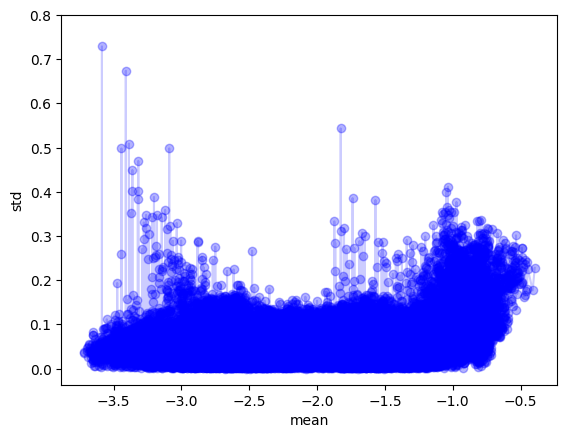

In [54]:
uncertainity_plot(sorted_mean_list, sorted_std_list)

In [14]:
def write_prediction(y_predict, model, error, target):
    tr_list = []
    details = ['id','prediction']
    index = 0
    df_rel = pd.read_csv('./perovskites/double_perovskites/targets_bvm_cubic.csv')
    for j in df_rel.index:
        temp_key = []
        temp_key.append(df_rel['file_name'][j].split('.')[0])
        # temp_key.append(df_rel['correct_formula'][i])
#         temp_key.append(df_rel['label'][j])
        temp_key.append(y_predict[index][0])
        index = index+1
        tr_list.append(temp_key)
    fn = model+'_'+target+'_'+ str(error)
    file_name = './perovskites/double_perovskites/screening/' +fn+ '.csv'
    # model_name =  './models_da/schnet/prediction_da_sp760_schnet_dblbvm_943_hfopt'+str(np.round(test_error_left,3))
    # model.save(model_name)

    with open(file_name, 'w') as f: 
        write = csv.writer(f) 
        write.writerow(details) 
        write.writerows(tr_list) 
        f.close()

In [53]:
def uncertainity_plot(mean_array, std_array):

  
    # initialize x and y coordinates
    x = mean_array
    # y1 = [0.059, 0.046, 0.034, 0.035]
    y2 = std_array


    # set the title of a plot
    # plt.title("Connected Scatterplot points with lines")
    plt.ylabel('std')
    plt.xlabel('mean')

    # plot scatter plot with x and y data
    # plt.scatter(x, y1, label='SchNet:W/O DA')
    plt.scatter(x, y2, color='blue', marker='o', alpha=.3)
    # plt.scatter(x, y3, label='PAiNN:W/O DA')
#     plt.scatter(x, y4, color = 'grey', label = 'PAiNN:W/ DA')

#     plt.legend(loc='upper right')

    plt.plot(x, y2, color='blue', alpha = 0.2)
    plt.yticks(np.arange(0, 0.9, 0.1))

#     plt.plot(x, y4, color = 'grey')


#     plt.errorbar(x, y2,
#                  yerr = y_error2,
#                  fmt ='o', color='blue')
#     plt.errorbar(x, y4,
#                  yerr = y_error4,
#                  fmt ='o', color = 'grey')
    # plot with x and y data
    # plt.plot(x, y1)
    # plt.plot(x, y2)
    # # plt.plot(x, y3)
    # plt.plot(x, y4)

In [20]:
df_rel = pd.read_csv('./perovskites/double_perovskites/targets_santosh.csv')
tr_list = []
details = ['id', 'prediction']
index = 0
for j in df_rel.index:
    temp_key = []
    temp_key.append(df_rel['file_name'][j])
    # temp_key.append(df_rel['correct_formula'][i])
    temp_key.append(y_predict_suxuen[index][0])
    index = index+1
    tr_list.append(temp_key)

with open('suxuen_bvm_hf_prediction_schnet0.027.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(details) 
    write.writerows(tr_list) 
    f.close()

In [ ]:
def train_kfold(dataset, labels, left_x, left_y):
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    fold = 0
    all_mae = []
    test_loss= []
    test_loss2 = []
    for train,test in kf.split(dataset):
    #      msle = MeanSquaredLogarithmicError()
    #      model.compile(
    #         loss=msle, 
    #         optimizer=Adam(learning_rate=learning_rate), 
    #         metrics=[msle]
    #      )
        # train the model
         print("===================Fold-",fold,"=====================================")
         x_train_k, y_train_k = dataset[train].tensor(model_config["inputs"]), labels[train]
         x_test_k, y_test_k = dataset[test].tensor(model_config["inputs"]), labels[test]
         model = make_crystal_model(**model_config)
         model.compile(
             loss="mean_absolute_error",
             optimizer=Adam(learning_rate=0.0005),
             metrics=["mean_absolute_error"],
        )
#          model.load_weights('/tmp/checkpoint_5k_schnet')

         history = model.fit(
            x_train_k, 
            y_train_k, 
            epochs=250, 
            batch_size=50,
            verbose=0
    #         validation_split=0.2
        )
    #      score = model.evaluate()
         y_predict = model.predict(x_test_k)
         y_test=np.array(y_test_k)
         y_predict2 = model.predict(left_x)
         mae2 = mae(left_y,y_predict2)
         mae_f = mae(y_test, y_predict)
         print(mae_f)
         print(mae2)
         test_loss.append(mae_f)
         test_loss2.append(mae2)
#          all_mae.append(mae_f)
#          all_mae = all_mae+mae_f
    # #      rmse_f = np.sqrt(mse_f)
    # #      r2_f = r2_score(y_test, y_predict)
         fold=fold+1
#          for i in range(0,len(y_test)):
#                 y_test_poly.append(y_test[i])
#                 y_predict_poly.append(y_predict[i])
#          scatter_comp(cheap_labels, exp_labels, y_predict,y_test ,"Cheap/ML Expensive","Expensive", "Parity Plot(10 fold)")
#          print("MAE:",mae_f)
    #      print("MSE:", mse_f)
    #      print("RMSE:", rmse_f)
    #      print("R-Squared:", r2_f)

    #      y_test_theo=np.array(y_theory[test])
    #      mse_f = mean_squared_error(y_test_theo, y_predict)
    #      mae_f = mean_absolute_error(y_test_theo, y_predict)
    #      rmse_f = np.sqrt(mse_f)
    #      r2_f = r2_score(y_test_theo, y_predict)
    #      fold=fold+1
    #      print("MAE:",mae_f)
    #      print("MSE:", mse_f)
    #      print("RMSE:", rmse_f)
    #      print("R-Squared:", r2_f)
    #      plot_graph(y[test],y_predict)
#     print(all_mae)
#     print("CV MAE:",np.mean(all_mae))
    print(test_loss)
    print(test_loss2)

In [21]:
pip install adapt


Note: you may need to restart the kernel to use updated packages.


In [23]:
from adapt.utils import make_regression_da
from adapt.parameter_based import RegularTransferNN
Xs, ys, Xt, yt = make_regression_da()
src_model = RegularTransferNN(loss="mse", lambdas=0., random_state=0)
src_model.fit(Xs, ys, epochs=100, verbose=0)
print(src_model.score(Xt, yt))
# 1/1 [==============================] - 0s 127ms/step - loss: 0.2744
# 0.27443504333496094
model = RegularTransferNN(src_model.task_, loss="mse", lambdas=1., random_state=0)
model.fit(Xt[:3], yt[:3], epochs=100, verbose=0)
model.score(Xt, yt)
# 1/1 [==============================] - 0s 109ms/step - loss: 0.0832
# 0.08321201056241989

1/1 [==============================] - 0s 37ms/step - loss: 0.3272
0.32715263962745667
1/1 [==============================] - 0s 57ms/step - loss: 0.1929


0.1928834468126297

('MAE TRAIN ERROR', 0.04049171904)
('MAE TEST ERROR', 0.01967689070500001)


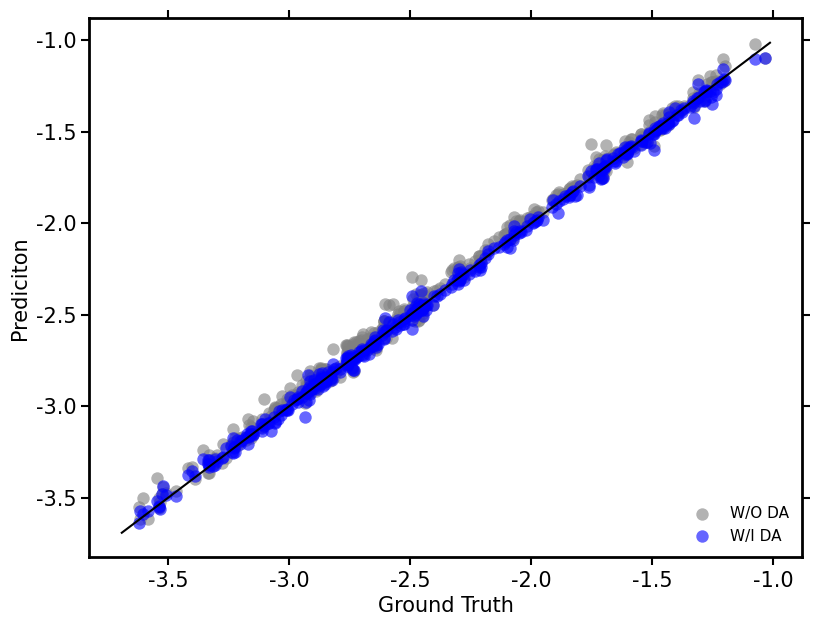

(0.04049171904, 0.01967689070500001)

In [26]:
df1 = pd.read_csv('./all_predictions/painn/prediction_noda_painn_dblbvm_745_hfopt0.04.csv') 
df2 = pd.read_csv('./all_predictions/painn/prediction_da_painn_dblbvm_745_hfopt0.02.csv') 

target1 = df1['target']
prediction1 = format_prediction(df1['prediction'])
target2 = df2['target']
prediction2 = format_prediction(df2['prediction'])

scatter_comp(target1, prediction1, target2,prediction2, 'Ground Truth', 'Prediciton','')

In [21]:
def scatter_comp(x1, y1, x2, y2, xlabel, ylabel, plot_name): # y_train,y_train_pred,y_test,y_test_pred
    '''
    :param x1: array or dataframe of target in train set
    :param y1: array or dataframe of ML predicted target in train set
    :param x2: array or dataframe of target in test set
    :param y2: array or dataframe of ML predicted target in test set
    :param xlabel: name of label along x-axis: datatype string
    :param ylabel: name of label along y-axis: datatype string
    :param plot_name: name to save the plot: datatype string
    :return: train error , test error
    '''
    axis_width = 2
    mpl.rcParams['mathtext.default'] = 'regular'
    mpl.rcParams['axes.linewidth'] = axis_width
    mpl.rcParams['axes.unicode_minus']=False

    fontsize = 15;alpha = 0.2;lw45 = 1.5;axis_width=1.5;figsize = (9.2,7);label_font = 24;tick_font = 20;leg_font = 20
    tick_len = 6;test_marker = 'o';train_marker = 'o';train_color = 'gray';test_color = 'blue';pt_alpha = 0.3;pt_lw = 0;
    pt_s = 80;htp=0.1;diag_color = 'black';diag_lw = axis_width;diag_ls = '-';text_font = 20;axis_width = 2;leg_fancy = False
    leg_frame = True;leg_alpha = 1;leg_loc = 'upper right';htp = 0.2;leg_color = 'white';leg_edge_color = 'black'
    leg_shadow = False;leg_lw = axis_width;s = 150;pt_lw = 0;decision_lw = axis_width;decision_ls = '--'
    decision_color = 'black';markersize = 80;alpha = 0.6;lw45 = 1.5;axis_width=1.5

    train_err = mae(y1, x1)
    test_err = mae(y2, x2)
    print(("MAE TRAIN ERROR", train_err))
    print(("MAE TEST ERROR", test_err))

    fig = plt.figure(figsize=figsize)    
    plt.scatter(x1, y1, color=train_color, marker=train_marker, s=markersize, alpha=alpha, lw=0)
    plt.scatter(x2, y2, color=test_color, marker=test_marker, s=markersize, alpha=alpha, lw=0)
    plt.legend(['W/O DA', 'W/I DA'], fontsize=fontsize-4, frameon=False, loc='lower right')
#     plt.legend(['Predicted BG vs Real BG'], fontsize=fontsize-4, frameon=False, loc='lower right')


    xmax = np.max(x1)
    xmin = np.min(x1)
    x45 = np.linspace(xmax*.98, xmin*1.02, num=100)
    y45 = x45
    plt.plot(x45, y45, color='black', lw=lw45, label='__nolegend__')

    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize)

    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    axes = plt.gca()
    axes.set_title(axes.get_title()) #* 2)
    axes.set_xlabel(axes.get_xlabel(), size=fontsize) #* 0.5) # fontname="Times New Roman")
    axes.set_ylabel(axes.get_ylabel(), size=fontsize)

    fig_label = "RMSE"

    plt.tick_params('both', length = 6, width = axis_width, which = 'major',right=True,top=True)

    
    #fig.savefig(plot_name, dpi=80, bbox_inches='tight')
    plt.show()
    plt.close()
    return train_err,test_err

In [ ]:
def scatter_comp(x1, y1, xlabel, ylabel, plot_name): # y_train,y_train_pred,y_test,y_test_pred
    '''
    :param x1: array or dataframe of target in train set
    :param y1: array or dataframe of ML predicted target in train set
    :param x2: array or dataframe of target in test set
    :param y2: array or dataframe of ML predicted target in test set
    :param xlabel: name of label along x-axis: datatype string
    :param ylabel: name of label along y-axis: datatype string
    :param plot_name: name to save the plot: datatype string
    :return: train error , test error
    '''
    axis_width = 2
    mpl.rcParams['mathtext.default'] = 'regular'
    mpl.rcParams['axes.linewidth'] = axis_width
    mpl.rcParams['axes.unicode_minus']=False

    fontsize = 15;alpha = 0.2;lw45 = 1.5;axis_width=1.5;figsize = (9.2,7);label_font = 24;tick_font = 20;leg_font = 20
    tick_len = 6;test_marker = 'o';train_marker = 'o';train_color = 'gray';test_color = 'blue';pt_alpha = 0.3;pt_lw = 0;
    pt_s = 80;htp=0.1;diag_color = 'black';diag_lw = axis_width;diag_ls = '-';text_font = 20;axis_width = 2;leg_fancy = False
    leg_frame = True;leg_alpha = 1;leg_loc = 'upper right';htp = 0.2;leg_color = 'white';leg_edge_color = 'black'
    leg_shadow = False;leg_lw = axis_width;s = 150;pt_lw = 0;decision_lw = axis_width;decision_ls = '--'
    decision_color = 'black';markersize = 80;alpha = 0.6;lw45 = 1.5;axis_width=1.5

    train_err = mae(y1, x1)
    test_err = mae(y2, x2)
    print(("MAE TRAIN ERROR", train_err))
    print(("MAE TEST ERROR", test_err))

    fig = plt.figure(figsize=figsize)    
    plt.scatter(x1, y1, color=train_color, marker=train_marker, s=markersize, alpha=alpha, lw=0)
    plt.scatter(x2, y2, color=test_color, marker=test_marker, s=markersize, alpha=alpha, lw=0)
    plt.legend(['train', 'test'], fontsize=fontsize-4, frameon=False, loc='lower right')
#     plt.legend(['Predicted BG vs Real BG'], fontsize=fontsize-4, frameon=False, loc='lower right')


    xmax = np.max(x1)
    xmin = np.min(x1)
    x45 = np.linspace(xmax*.98, xmin*1.02, num=100)
    y45 = x45
    plt.plot(x45, y45, color='black', lw=lw45, label='__nolegend__')

    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize)

    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    axes = plt.gca()
    axes.set_title(axes.get_title()) #* 2)
    axes.set_xlabel(axes.get_xlabel(), size=fontsize) #* 0.5) # fontname="Times New Roman")
    axes.set_ylabel(axes.get_ylabel(), size=fontsize)

    fig_label = "RMSE"

    plt.tick_params('both', length = 6, width = axis_width, which = 'major',right=True,top=True)

    
    #fig.savefig(plot_name, dpi=80, bbox_inches='tight')
    plt.show()
    plt.close()
    return train_err,test_err

In [25]:
def format_prediction(y):
    y_arr=[]
    for i in y:
      i = str(i)
      y_mod=i.replace("[","")
      y_mod=y_mod.replace("]","")
#   print(y_mod)
      y_arr.append(float(y_mod))
    return y_arr

In [10]:
from pymatgen.core import Lattice, Structure
import re
from operator import itemgetter


In [24]:
mod_scale = {
    "He": 1,
    "Ne": 2,
    "Ar": 3,
    "Kr": 4,
    "Xe": 5,
    "Rn": 6,
    "Fr": 7,
    "Cs": 8,
    "Rb": 9,
    "K": 10,
    "Na": 11,
    "Li": 12,
    "Ra": 13,
    "Ba": 14,
    "Sr": 15,
    "Ca": 16,
    "Eu": 17,
    "Yb": 18,
    "Lu": 19,
    "Tm": 20,
    "Y": 21,
    "Er": 22,
    "Ho": 23,
    "Dy": 24,
    "Tb": 25,
    "Gd": 26,
    "Sm": 27,
    "Pm": 28,
    "Nd": 29,
    "Pr": 30,
    "Ce": 31,
    "La": 32,
    "Ac": 33,
    "Th": 34,
    "Pa": 35,
    "U": 36,
    "Np": 37,
    "Pu": 38,
    "Am": 39,
    "Cm": 40,
    "Bk": 41,
    "Cf": 42,
    "Es": 43,
    "Fm": 44,
    "Md": 45,
    "No": 46,
    "Lr": 47,
    "Sc": 48,
    "Zr": 49,
    "Hf": 50,
    "Ti": 51,
    "Ta": 52,
    "Nb": 53,
    "V": 54,
    "Cr": 55,
    "Mo": 56,
    "W": 57,
    "Re": 58,
    "Tc": 59,
    "Os": 60,
    "Ru": 61,
    "Ir": 62,
    "Rh": 63,
    "Pt": 64,
    "Pd": 65,
    "Au": 66,
    "Ag": 67,
    "Cu": 68,
    "Ni": 69,
    "Co": 70,
    "Fe": 71,
    "Mn": 72,
    "Mg": 73,
    "Zn": 74,
    "Cd": 75,
    "Hg": 76,
    "Be": 77,
    "Al": 78,
    "Ga": 79,
    "In": 80,
    "Tl": 81,
    "Pb": 82,
    "Sn": 83,
    "Ge": 84,
    "Si": 85,
    "B": 86,
    "C": 87,
    "N": 88,
    "P": 89,
    "As": 90,
    "Sb": 91,
    "Bi": 92,
    "Po": 93,
    "Te": 94,
    "Se": 95,
    "S": 96,
    "O": 97,
    "At": 98,
    "I": 99,
    "Br": 100,
    "Cl": 101,
    "F": 102,
    "H": 103
    }

print(len(mod_scale))
norm_atm_num = {}
for i in mod_scale:
    norm_atm_num[str(i)] = mod_scale[str(i)]/float(max(mod_scale.values()))
    

103


In [25]:
print(norm_atm_num)

{'He': 0.009708737864077669, 'Ne': 0.019417475728155338, 'Ar': 0.02912621359223301, 'Kr': 0.038834951456310676, 'Xe': 0.04854368932038835, 'Rn': 0.05825242718446602, 'Fr': 0.06796116504854369, 'Cs': 0.07766990291262135, 'Rb': 0.08737864077669903, 'K': 0.0970873786407767, 'Na': 0.10679611650485436, 'Li': 0.11650485436893204, 'Ra': 0.1262135922330097, 'Ba': 0.13592233009708737, 'Sr': 0.14563106796116504, 'Ca': 0.1553398058252427, 'Eu': 0.1650485436893204, 'Yb': 0.17475728155339806, 'Lu': 0.18446601941747573, 'Tm': 0.1941747572815534, 'Y': 0.20388349514563106, 'Er': 0.21359223300970873, 'Ho': 0.22330097087378642, 'Dy': 0.23300970873786409, 'Tb': 0.24271844660194175, 'Gd': 0.2524271844660194, 'Sm': 0.2621359223300971, 'Pm': 0.27184466019417475, 'Nd': 0.2815533980582524, 'Pr': 0.2912621359223301, 'Ce': 0.30097087378640774, 'La': 0.3106796116504854, 'Ac': 0.32038834951456313, 'Th': 0.3300970873786408, 'Pa': 0.33980582524271846, 'U': 0.34951456310679613, 'Np': 0.3592233009708738, 'Pu': 0.3689

In [11]:
bcc_fe_from_cart = Structure(Lattice.cubic(2.8), ["Fe", "Fe"], [[0, 0, 0], [1.4, 1.4, 1.4]],
                             coords_are_cartesian=True)
print(bcc_fe_from_cart.composition)
# elements= re.findall("[a-zA-Z]+",str(bcc_fe_from_cart.species))
# print(elements)
elements = [i for i in re.findall("[a-zA-Z]+",str(bcc_fe_from_cart.species)) if i != 'Element']
print(elements)
# list_set = set(bcc_fe_from_cart.species)
#     # convert the set to the list
# unique_list = (list(list_set))
# # print(unique_list[0])
# print(modified_pettifor(elements[0]))

itemgetter(*[i for i in re.findall("[a-zA-Z]+",str(bcc_fe_from_cart.species)) if i != 'Element'])(mod_scale)

Fe2
['Fe', 'Fe']


NameError: name 'mod_scale' is not defined

In [24]:
def modified_pettifor(in_atom):

    mod_scale = {
    "He": 1,`
    "Ne": 2,
    "Ar": 3,
    "Kr": 4,
    "Xe": 5,
    "Rn": 6,
    "Fr": 7,
    "Cs": 8,
    "Rb": 9,
    "K": 10,
    "Na": 11,
    "Li": 12,
    "Ra": 13,
    "Ba": 14,
    "Sr": 15,
    "Ca": 16,
    "Eu": 17,
    "Yb": 18,
    "Lu": 19,
    "Tm": 20,
    "Y": 21,
    "Er": 22,
    "Ho": 23,
    "Dy": 24,
    "Tb": 25,
    "Gd": 26,
    "Sm": 27,
    "Pm": 28,
    "Nd": 29,
    "Pr": 30,
    "Ce": 31,
    "La": 32,
    "Ac": 33,
    "Th": 34,
    "Pa": 35,
    "U": 36,
    "Np": 37,
    "Pu": 38,
    "Am": 39,
    "Cm": 40,
    "Bk": 41,
    "Cf": 42,
    "Es": 43,
    "Fm": 44,
    "Md": 45,
    "No": 46,
    "Lr": 47,
    "Sc": 48,
    "Zr": 49,
    "Hf": 50,
    "Ti": 51,
    "Ta": 52,
    "Nb": 53,
    "V": 54,
    "Cr": 55,
    "Mo": 56,
    "W": 57,
    "Re": 58,
    "Tc": 59,
    "Os": 60,
    "Ru": 61,
    "Ir": 62,
    "Rh": 63,
    "Pt": 64,
    "Pd": 65,
    "Au": 66,
    "Ag": 67,
    "Cu": 68,
    "Ni": 69,
    "Co": 70,
    "Fe": 71,
    "Mn": 72,
    "Mg": 73,
    "Zn": 74,
    "Cd": 75,
    "Hg": 76,
    "Be": 77,
    "Al": 78,
    "Ga": 79,
    "In": 80,
    "Tl": 81,
    "Pb": 82,
    "Sn": 83,
    "Ge": 84,
    "Si": 85,
    "B": 86,
    "C": 87,
    "N": 88,
    "P": 89,
    "As": 90,
    "Sb": 91,
    "Bi": 92,
    "Po": 93,
    "Te": 94,
    "Se": 95,
    "S": 96,
    "O": 97,
    "At": 98,
    "I": 99,
    "Br": 100,
    "Cl": 101,
    "F": 102,
    "H": 103
    }

#     return mod_scale[in_atom]/float(max(mod_scale.values()))
    return mod_scale[in_atom]